In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras import regularizers, optimizers
import matplotlib.pyplot as plt



In [ ]:
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cuts off reviews after this many words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))



In [ ]:
optimizer = optimizers.Adam(clipnorm=1.0)  # Clip gradients if their L2 norm exceeds 1.0
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 418s 665ms/step - loss: 0.6152 - accuracy: 0.7808 - val_loss: 0.4639 - val_accuracy: 0.8288
Epoch 2/10
625/625 [==============================] - 405s 648ms/step - loss: 0.3741 - accuracy: 0.8691 - val_loss: 0.3973 - val_accuracy: 0.8590
Epoch 3/10
625/625 [==============================] - 445s 712ms/step - loss: 0.3369 - accuracy: 0.8939 - val_loss: 0.4407 - val_accuracy: 0.8492
Epoch 4/10
625/625 [==============================] - 407s 652ms/step - loss: 0.2950 - accuracy: 0.9110 - val_loss: 0.4009 - val_accuracy: 0.8682
Epoch 5/10
625/625 [==============================] - 413s 662ms/step - loss: 0.2608 - accuracy: 0.9262 - val_loss: 0.3812 - val_accuracy: 0.8544
Epoch 6/10
625/625 [==============================] - 407s 650ms/step - loss: 0.2548 - accuracy: 0.9283 - val_loss: 0.3955 - val_accuracy: 0.8698
Epoch 7/10
625/625 [==============================] - 411s 657ms/step - loss: 0.2406 - accuracy: 0.9338 - val_loss: 0.4308 -

In [ ]:
score, accuracy = model.evaluate(input_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accuracy)


782/782 [==============================] - 73s 94ms/step - loss: 0.4743 - accuracy: 0.8552
Test score: 0.4742680490016937
Test accuracy: 0.8551599979400635


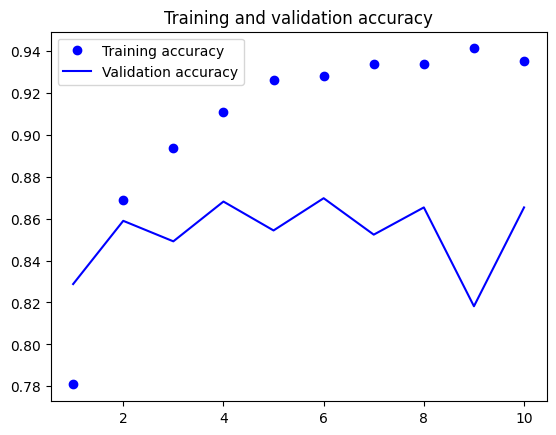

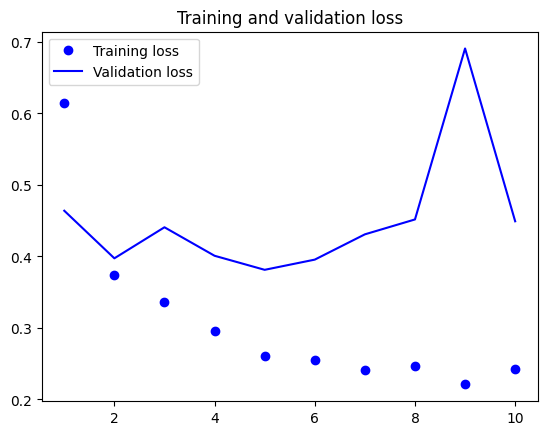

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
